Starting training run...


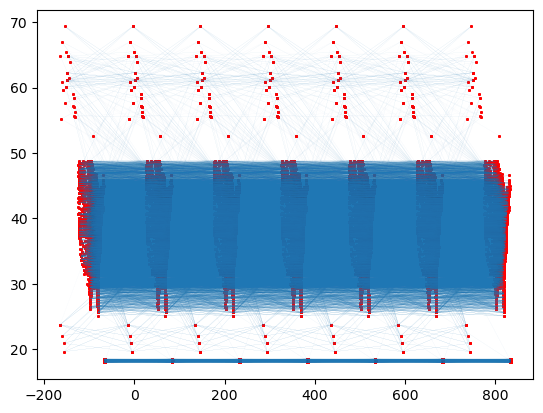

In [1]:
import torch
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from gtda.graphs import KNeighborsGraph
import itertools
from utils import GraphRNN_dataset, GraphRNN_DataSampler

from importlib import reload
import matplotlib.pyplot as plt

print("Starting training run...")
flow_dataset = "../data/daily_county2county_2019_01_01.csv"
epi_dataset = "../data_epi/epidemiology.csv"
epi_dates = ["2020-06-09", "2020-06-10", "2020-06-11", "2020-06-12",
             "2020-06-13", "2020-06-14", "2020-06-15", "2020-06-16",
             "2020-06-17", "2020-06-18", "2020-06-19", "2020-06-20",
             "2020-06-21", "2020-06-22", "2020-06-23", "2020-06-24",
                "2020-06-25", "2020-06-26", "2020-06-27", "2020-06-28",
                "2020-06-29", "2020-06-30", "2020-07-01", "2020-07-02",
                "2020-07-03", "2020-07-04", "2020-07-05", "2020-07-06",
                "2020-07-07", "2020-07-08", "2020-07-09", "2020-07-10",
                "2020-07-11", "2020-07-12", "2020-07-13", "2020-07-14",
                "2020-07-15", "2020-07-16", "2020-07-17", "2020-07-18",
                "2020-07-19", "2020-07-20", "2020-07-21", "2020-07-22",
                "2020-07-23", "2020-07-24", "2020-07-25", "2020-07-26",
                "2020-07-27", "2020-07-28", "2020-07-29", "2020-07-30"
             ]
epi_dates_one_sample = ["2020-06-09", "2020-06-10", "2020-06-11", "2020-06-12",
             "2020-06-13", "2020-06-14", "2020-06-15"] # for one training example
epi_dates_pred_one_sample = ["2020-06-16"] 

input_hor = 5
pred_hor = 1

# CREATION OF DATALOADER
from preprocessor import Preprocessor
from preprocessor import draw_network
from preprocessor import get_adj_from_plot

# Pull in the sparsified version of the graph from Victor's preprocessor.py file
# Create a 7 day kronecker with no edge weight info or node info
preprocessor = Preprocessor(flow_dataset, epi_dataset, epi_dates_one_sample, plottable=True)
graph_df = preprocessor.combined_manual_kronecker()
draw_network(graph_df)
w_adj_kron = get_adj_from_plot(graph_df)

# adjacency shape is good
# adjacency is weighted which is also good -- seemingly maximum value is 1? could be true?


In [2]:
# assign the covid info per node per time step
# requires using the new geoid_d naming convention



print(graph_df.head())

preprocessor_prediction = Preprocessor(flow_dataset, epi_dataset, epi_dates_one_sample, plottable=True)
# get a column of the output graph signal (graph signal at the time step after the last one in the kronecker)
_, signals_prediction = preprocessor_prediction.disjoint_manual_kronecker()
print(signals_prediction) # graph signal at time step 8, assuming you have a window size of 7



ImportError: cannot import name 'disjoint_manual_kronecker' from 'preprocessor' (/Users/anja/Documents/Documents - Mac/Delft/Q4/GraphsML/final/code_v2/GraphML/ClassicalModels/../preprocessor.py)